# Module 11 Challenge
## Deliverable 2: Scrape and Analyze Mars Weather Data

In [206]:
# Import relevant libraries
from splinter import Browser
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [208]:
browser = Browser('chrome')

### Step 1: Visit the Website

Use automated browsing to visit the [Mars Temperature Data Site](https://static.bc-edx.com/data/web/mars_facts/temperature.html). Inspect the page to identify which elements to scrape.

   > **Hint** To identify which elements to scrape, you might want to inspect the page by using Chrome DevTools to discover whether the table contains usable classes.


In [209]:
# Visit the website
# https://static.bc-edx.com/data/web/mars_facts/temperature.html
url = "https://static.bc-edx.com/data/web/mars_facts/temperature.html"
browser.visit(url)

### Step 2: Scrape the Table

Create a Beautiful Soup object and use it to scrape the data in the HTML table.

Note that this can also be achieved by using the Pandas `read_html` function. However, use Beautiful Soup here to continue sharpening your web scraping skills.

In [4]:
# Create a Beautiful Soup Object
html = browser.html
soup = BeautifulSoup(html, 'html.parser')


In [5]:
# Extract all rows of data
html_read = pd.read_html(url)


### Step 3: Store the Data

Assemble the scraped data into a Pandas DataFrame. The columns should have the same headings as the table on the website. Here’s an explanation of the column headings:

* `id`: the identification number of a single transmission from the Curiosity rover
* `terrestrial_date`: the date on Earth
* `sol`: the number of elapsed sols (Martian days) since Curiosity landed on Mars
* `ls`: the solar longitude
* `month`: the Martian month
* `min_temp`: the minimum temperature, in Celsius, of a single Martian day (sol)
* `pressure`: The atmospheric pressure at Curiosity's location

In [ ]:
# Create an empty list



# Loop through the scraped data to create a list of rows


#### See below ### 




In [7]:
# Create a Pandas DataFrame by using the list of rows and a list of the column names
mars_weather_df = html_read[0]

In [8]:
# Confirm DataFrame was created successfully
mars_weather_df.head()


,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0


### Step 4: Prepare Data for Analysis

Examine the data types that are currently associated with each column. If necessary, cast (or convert) the data to the appropriate `datetime`, `int`, or `float` data types.

  > **Hint** You can use the Pandas `astype` and `to_datetime` methods to accomplish this task.


In [9]:
# Examine data type of each column
print(mars_weather_df.dtypes)

id                    int64
terrestrial_date     object
sol                   int64
ls                    int64
month                 int64
min_temp            float64
pressure            float64
dtype: object


In [10]:
# Change data types for data analysis
mars_weather_df = mars_weather_df.astype({'id' : object, 'sol' : np.int32, 'ls' : np.int32, 'month' : np.int32,
                                          'min_temp' : np.float64, 'pressure' : np.float64})
mars_weather_df['terrestrial_date'] = pd.to_datetime(mars_weather_df['terrestrial_date'])

In [ ]:
# Confirm type changes were successful by examining data types again
print(mars_weather_df.dtypes)

id                          object
terrestrial_date    datetime64[ns]
sol                          int32
ls                           int32
month                        int32
min_temp                   float64
pressure                   float64
dtype: object


### Step 5: Analyze the Data

Analyze your dataset by using Pandas functions to answer the following questions:

1. How many months exist on Mars?
2. How many Martian (and not Earth) days worth of data exist in the scraped dataset?
3. What are the coldest and the warmest months on Mars (at the location of Curiosity)? To answer this question:
    * Find the average the minimum daily temperature for all of the months.
    * Plot the results as a bar chart.
4. Which months have the lowest and the highest atmospheric pressure on Mars? To answer this question:
    * Find the average the daily atmospheric pressure of all the months.
    * Plot the results as a bar chart.
5. About how many terrestrial (Earth) days exist in a Martian year? To answer this question:
    * Consider how many days elapse on Earth in the time that Mars circles the Sun once.
    * Visually estimate the result by plotting the daily minimum temperature.


In [12]:
# 1. How many months are there on Mars?
print(max(mars_weather_df['month']))

12


In [13]:
# 2. How many sols (Martian days) worth of data are there?
print(len(mars_weather_df['sol']))

1867


In [220]:
# 3. What is the average minimum temperature by month?
mars_weather_month_gb = mars_weather_df.groupby(['month'])['min_temp'].mean()
mars_weather_month_gb.head()

month
1   -77.160920
2   -79.932584
3   -83.307292
4   -82.747423
5   -79.308725
Name: min_temp, dtype: float64

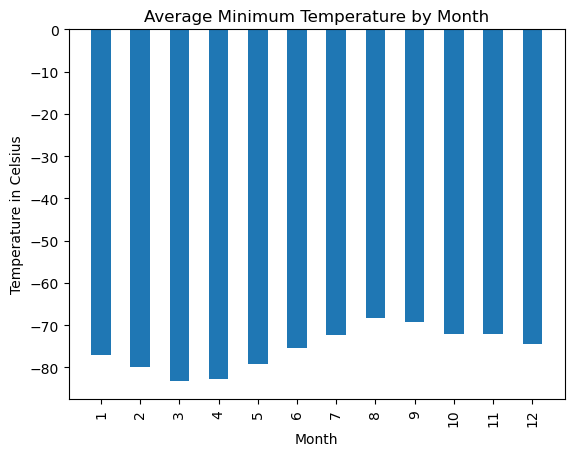

In [15]:
# Plot the average minimum temperature by month
#Converting Series to proper dataframe format
mars_weather_month_df = mars_weather_month_gb.to_frame()
mars_weather_month_df = mars_weather_month_df.reset_index()


#Code for Bar Chart
plt.bar(mars_weather_month_df['month'],mars_weather_month_df['min_temp'], width=.5)
plt.xticks(mars_weather_month_df['month'],rotation=90)
plt.title('Average Minimum Temperature by Month')
plt.xlabel('Month')
plt.ylabel('Temperature in Celsius')
plt.show()

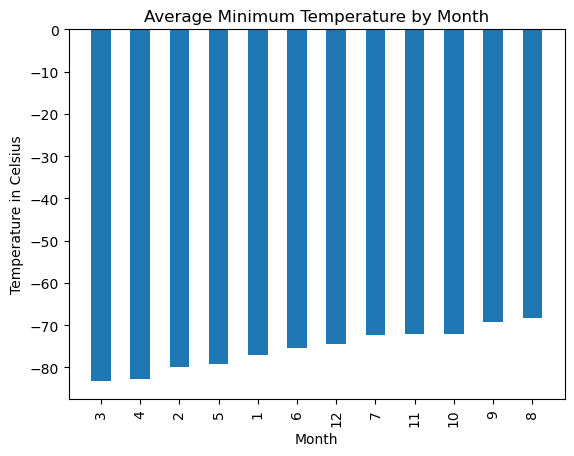

In [ ]:
# Identify the coldest and hottest months in Curiosity's location by sorting the previous graph

#Sorting data by min_temp and reseting index for graph
mars_weather_month_df = mars_weather_month_df.sort_values('min_temp')
mars_weather_month_sort_df = mars_weather_month_df.reset_index()
mars_weather_month_sort_df = mars_weather_month_sort_df.drop('index', axis=1)


#grabbing list of months for xticks
list_of_months = mars_weather_month_sort_df['month'].to_list()
print(f'Max: {max(mars_weather_month_df)}, Min')


#Plotting Bar Chart
plt.bar(mars_weather_month_sort_df.index,'min_temp', data=mars_weather_month_sort_df, width=.5)
plt.xticks(mars_weather_month_sort_df.index, list_of_months, rotation=90)
plt.title('Average Minimum Temperature by Month')
plt.xlabel('Month')
plt.ylabel('Temperature in Celsius')
plt.show()

In [218]:
# 4. What is the average pressure by month?
avg_press_bymonth_gb = mars_weather_df.groupby('month')['pressure'].mean()
avg_press_bymonth_df = avg_press_bymonth_gb.to_frame()
avg_press_bymonth_df = avg_press_bymonth_df.reset_index()
avg_press_bymonth_df

,month,pressure
0,1,862.488506
1,2,889.455056
2,3,877.322917
3,4,806.329897
4,5,748.557047
5,6,745.054422
6,7,795.105634
7,8,873.829787
8,9,913.305970
9,10,887.312500


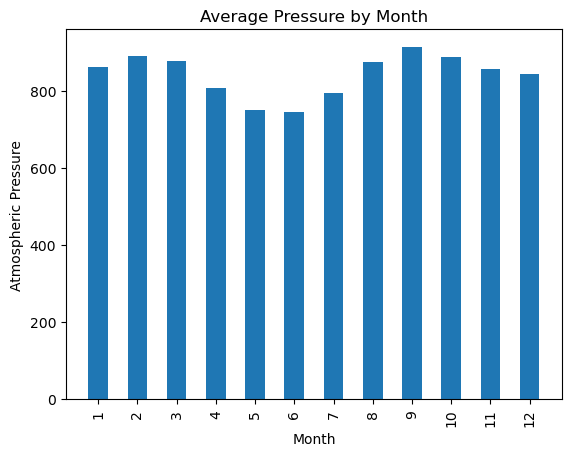

In [43]:
# Plot the average pressure by month
plt.bar(avg_press_bymonth_df['month'],avg_press_bymonth_df['pressure'], width=.5)
plt.xticks(avg_press_bymonth_df['month'], rotation=90)
plt.title('Average Pressure by Month')
plt.xlabel('Month')
plt.ylabel('Atmospheric Pressure')
plt.show()


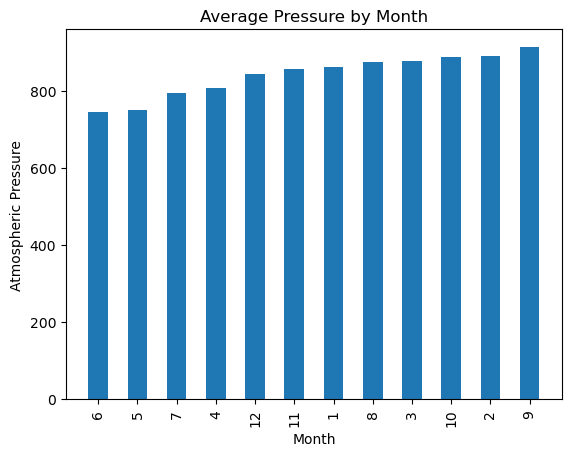

In [49]:
# Identify the lowest and highest pressure months in Curiosity's location by sorting the previous graph
avg_press_bymonth_df_sort = avg_press_bymonth_df.sort_values('pressure')
avg_press_bymonth_df_sort = avg_press_bymonth_df_sort.reset_index()
avg_press_bymonth_df_sort = avg_press_bymonth_df_sort.drop('index', axis=1)
avg_press_bymonth_df_sort.head()

list_of_months = avg_press_bymonth_df_sort['month']


plt.bar(avg_press_bymonth_df_sort.index, avg_press_bymonth_df_sort['pressure'], width=.5)
plt.xticks(avg_press_bymonth_df_sort.index, list_of_months, rotation=90)
plt.title('Average Pressure by Month')
plt.xlabel('Month')
plt.ylabel('Atmospheric Pressure')
plt.show()

Estimated terrestrial days in Martian year: 688 days 00:00:00


Text(35.347222222222214, 0.5, 'Minimum Temperature')

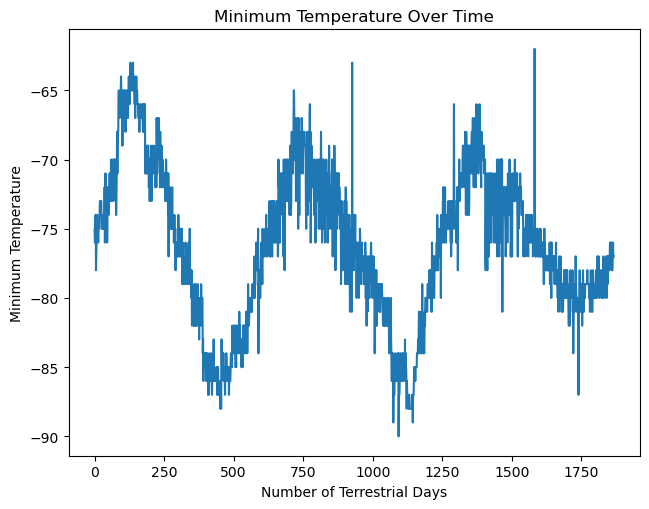

In [213]:
# 5. How many terrestrial (Earth) days are there in a Martian year?

#New Dataframe for finding mars year(ls)
mars_year_df = mars_weather_df[mars_weather_df['ls'] == 0]
mars_year_df = mars_year_df.sort_values('sol')

##Testing
# print(len(mars_year_df['sol'].unique()) - len(mars_year_df))
# dupes = mars_weather_df['sol'].duplicated()
# print(len(dupes) - len(dupes == True))


#Creating nested for loop to finding smallest gap between ls > 1
original_sol = mars_year_df['sol'].iloc[0]
last_l = original_sol

for sol in mars_year_df['sol']:
    current = sol    
    if current - last_l > 1:
        low_sol = current
        for sol in mars_year_df['sol']:
            current = sol
            if current - low_sol == 1 and current - low_sol > 0:
                high_sol = current                
                break
            else:
                pass
        break
    else:
        last_l = current


#Confirming results
# print(f'{original_sol=}, {high_sol=}')

#Calculating elapsed time between sol dates
first_terr_date = mars_year_df[mars_year_df['sol']== original_sol]
last_terr_date = mars_year_df[mars_year_df['sol']== high_sol]

elapsed_time = last_terr_date['terrestrial_date'].iloc[0] - first_terr_date['terrestrial_date'].iloc[0] 
print(f'Estimated terrestrial days in Martian year: {elapsed_time}')



# Visually estimate the result by plotting the daily minimum temperature of each observation in the data set.


plt.plot(mars_weather_df.index, mars_weather_df['min_temp'])
plt.tight_layout()
plt.title('Minimum Temperature Over Time')
plt.xlabel('Number of Terrestrial Days')
plt.ylabel('Minimum Temperature')

#### Minimum Temperature

Month with lowest temperature on average: 8th Month (-68.38 degrees Celsius)

Month with hightest temperature on average: 3rd Month (-83.31 degrees Celsius)


#### Atmospheric Pressure

Month with lowest atmospheric pressure on average: 6th Month (745.05 Pa)

Month with highest atmospheric pressing on average: 9th Month (913.31 Pa) 

#### Year Length

Estimated terrestrial days in Martian year: 687 to 688 days

### Step 6: Save the Data

Export the DataFrame to a CSV file.

In [225]:
# Write the data to a CSV

mars_weather_df.to_csv('Resources/Mars_Weather.csv', date_format='%Y-%m-%d')

In [226]:
browser.quit()